In [ ]:
!pip install --upgrade tf-keras-vis tensorflow

In [ ]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import tensorflow as tf
from tf_keras_vis.utils import num_of_gpus

_, gpus = num_of_gpus()
print('{} GPUs'.format(gpus))

1 GPUs


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16 as Model

# Load model
model = Model(weights='imagenet', include_top=True)
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
layer_name = 'block5_conv3' # The target layer that is the last layer of VGG16.

def model_modifier(current_model):
    target_layer = current_model.get_layer(name=layer_name)
    new_model = tf.keras.Model(inputs=current_model.inputs,
                               outputs=target_layer.output)
    new_model.layers[-1].activation = tf.keras.activations.linear
    return new_model

In [ ]:
from tf_keras_vis.activation_maximization import ActivationMaximization

activation_maximization = ActivationMaximization(model, model_modifier, clone=False)

In [ ]:
filter_number = 7
def loss(output):
    return output[..., filter_number]

In [ ]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

<timed exec>:4: DeprecationWarning: Call to deprecated class PrintLogger. (Use `Progress` instead.) -- Deprecated since version 0.7.0.


Steps: 050	Scores: [[652.880859375]],	Regularization: [('TotalVariation2D', [10.570174217224121]), ('Norm', [38.31980895996094])]
Steps: 100	Scores: [[909.8063354492188]],	Regularization: [('TotalVariation2D', [11.820954322814941]), ('Norm', [38.736656188964844])]
Steps: 150	Scores: [[1000.5077514648438]],	Regularization: [('TotalVariation2D', [11.58329963684082]), ('Norm', [39.18376541137695])]
Steps: 200	Scores: [[1008.569580078125]],	Regularization: [('TotalVariation2D', [10.943800926208496]), ('Norm', [39.59925842285156])]


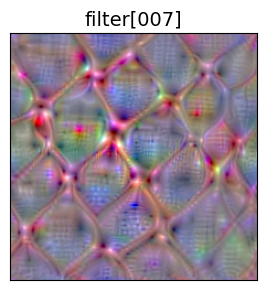

In [ ]:
%%time
from tf_keras_vis.utils.callbacks import Print

# Generate max activation
activation = activation_maximization(loss, callbacks=[Print(interval=50)])
image = activation[0].astype(np.uint8)

# Render
subplot_args = { 'nrows': 1, 'ncols': 1, 'figsize': (3, 3),
                 'subplot_kw': {'xticks': [], 'yticks': []} }

f, ax = plt.subplots(**subplot_args)
ax.imshow(image)
ax.set_title('filter[{:03d}]'.format(filter_number), fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
filter_numbers = [63, 132, 320]

# Define loss function that returns multiple filter outputs.
def loss(output):
    return (output[0, ..., 63], output[1, ..., 132], output[2, ..., 320])

In [ ]:
seed_input = tf.random.uniform((3, 224, 224, 3), 0, 255)

<timed exec>:4: DeprecationWarning: Call to deprecated class PrintLogger. (Use `Progress` instead.) -- Deprecated since version 0.7.0.


Steps: 050	Scores: [[365.563232421875, 330.9297180175781, 421.5631103515625]],	Regularization: [('TotalVariation2D', [8.085561752319336, 7.6924543380737305, 8.412383079528809]), ('Norm', [38.29747772216797, 38.24232482910156, 38.38867950439453])]
Steps: 100	Scores: [[547.0122680664062, 450.4642333984375, 544.556396484375]],	Regularization: [('TotalVariation2D', [9.502119064331055, 8.277666091918945, 9.226103782653809]), ('Norm', [38.47842025756836, 38.38591766357422, 38.625572204589844])]
Steps: 150	Scores: [[652.807861328125, 517.3021240234375, 649.3218383789062]],	Regularization: [('TotalVariation2D', [11.02513313293457, 9.458480834960938, 10.71147346496582]), ('Norm', [38.71524429321289, 38.56717300415039, 38.9019775390625])]
Steps: 200	Scores: [[691.6622924804688, 538.4530029296875, 655.8040161132812]],	Regularization: [('TotalVariation2D', [10.69675064086914, 8.96880054473877, 10.22692584991455]), ('Norm', [38.95841979980469, 38.74925994873047, 39.155494689941406])]


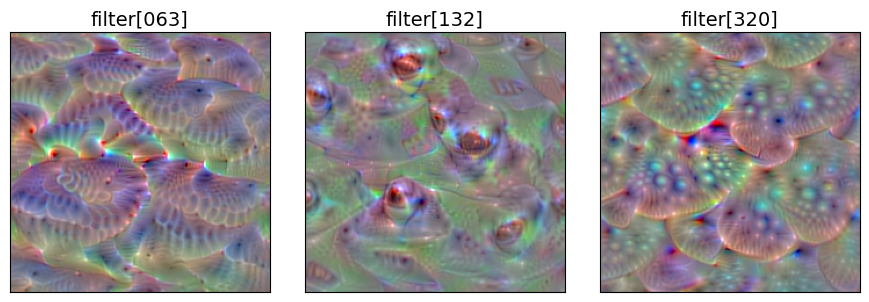

CPU times: user 25.4 s, sys: 322 ms, total: 25.7 s
Wall time: 31.5 s


In [ ]:
%%time

# Generate max activation
activations = activation_maximization(loss,
                                      seed_input=seed_input, # To generate multiple images
                                      callbacks=[Print(interval=50)])
images = [activation.astype(np.uint8) for activation in activations]

# Render
subplot_args = { 'nrows': 1, 'ncols': 3, 'figsize': (9, 3),
                 'subplot_kw': {'xticks': [], 'yticks': []} }
f, ax = plt.subplots(**subplot_args)
for i, filter_number in enumerate(filter_numbers):
    ax[i].set_title('filter[{:03d}]'.format(filter_number), fontsize=14)
    ax[i].imshow(images[i])

plt.tight_layout()
plt.show()

In [ ]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import tensorflow as tf
from tf_keras_vis.utils import num_of_gpus

_, gpus = num_of_gpus()
print('{} GPUs'.format(gpus))

from tensorflow.keras.applications.vgg16 import VGG16 as Model

# Load model
model = Model(weights='imagenet', include_top=True)
model.summary()

1 GPUs
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)      

In [ ]:
def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear

In [ ]:
from tf_keras_vis.activation_maximization import ActivationMaximization

activation_maximization = ActivationMaximization(model,
                                                 model_modifier,
                                                 clone=False)

In [ ]:
def loss(output):
    return output[:, 20]

<timed exec>:4: DeprecationWarning: Call to deprecated class PrintLogger. (Use `Progress` instead.) -- Deprecated since version 0.7.0.


Steps: 050	Scores: [[42.81904602050781]],	Regularization: [('TotalVariation2D', [4.359503746032715]), ('Norm', [38.21126174926758])]
Steps: 100	Scores: [[92.22624969482422]],	Regularization: [('TotalVariation2D', [4.707646369934082]), ('Norm', [38.16341781616211])]
Steps: 150	Scores: [[113.04124450683594]],	Regularization: [('TotalVariation2D', [5.087879180908203]), ('Norm', [38.14202880859375])]
Steps: 200	Scores: [[130.8195037841797]],	Regularization: [('TotalVariation2D', [5.12115478515625]), ('Norm', [38.14390182495117])]


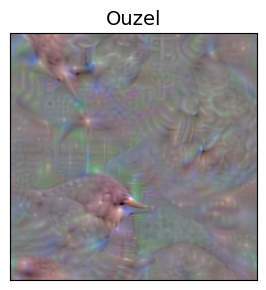

CPU times: user 13.4 s, sys: 204 ms, total: 13.6 s
Wall time: 14 s


In [ ]:
%%time

from tf_keras_vis.utils.callbacks import Print

activation = activation_maximization(loss,
                                     callbacks=[Print(interval=50)])
image = activation[0].astype(np.uint8)

subplot_args = { 'nrows': 1, 'ncols': 1, 'figsize': (3, 3),
                 'subplot_kw': {'xticks': [], 'yticks': []} }
f, ax = plt.subplots(**subplot_args)
ax.imshow(image)
ax.set_title('Ouzel', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
image_titles = ['Goldfish', 'Bear', 'Assault rifle']

def loss(output):
    return (output[0, 1], output[1, 294], output[2, 413])

In [ ]:
seed_input = tf.random.uniform((3, 224, 224, 3), 0, 255)

<timed exec>:5: DeprecationWarning: Call to deprecated class PrintLogger. (Use `Progress` instead.) -- Deprecated since version 0.7.0.


Steps: 050	Scores: [[121.16402435302734, 52.74947738647461, 17.0267276763916]],	Regularization: [('TotalVariation2D', [5.40427303314209, 4.192519664764404, 3.5493197441101074]), ('Norm', [38.18572998046875, 38.163272857666016, 38.19463348388672])]
Steps: 100	Scores: [[184.87881469726562, 103.88959503173828, 69.2865219116211]],	Regularization: [('TotalVariation2D', [5.847026824951172, 4.509489059448242, 3.8672378063201904]), ('Norm', [38.21692657470703, 38.12584686279297, 38.1204948425293])]
Steps: 150	Scores: [[233.14195251464844, 133.1155548095703, 87.46961975097656]],	Regularization: [('TotalVariation2D', [6.470264434814453, 5.1996355056762695, 4.243296146392822]), ('Norm', [38.31306838989258, 38.131099700927734, 38.083099365234375])]
Steps: 200	Scores: [[231.23326110839844, 133.02328491210938, 78.39695739746094]],	Regularization: [('TotalVariation2D', [6.003905773162842, 4.967588901519775, 4.005338191986084]), ('Norm', [38.399662017822266, 38.148685455322266, 38.04811477661133])]
St

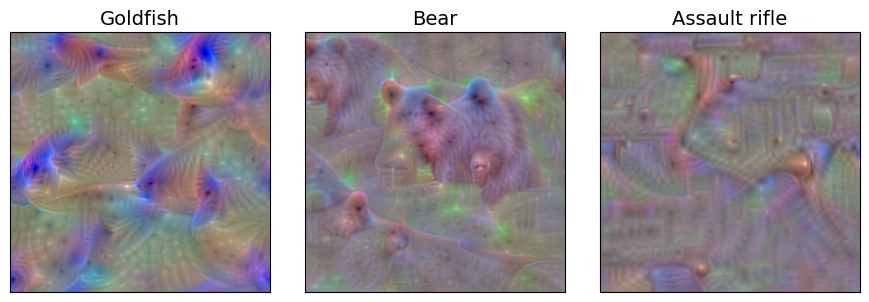

CPU times: user 1min, sys: 537 ms, total: 1min
Wall time: 1min 2s


In [ ]:
%%time

# Do 500 iterations and Generate an optimizing animation
activations = activation_maximization(loss,
                                      seed_input=seed_input,
                                      steps=512,
                                      callbacks=[ Print(interval=50)])
images = [activation.astype(np.uint8) for activation in activations]

# Render
subplot_args = { 'nrows': 1, 'ncols': 3, 'figsize': (9, 3),
                 'subplot_kw': {'xticks': [], 'yticks': []} }
f, ax = plt.subplots(**subplot_args)
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=14)
    ax[i].imshow(images[i])
plt.tight_layout()

plt.show()